Selected 71 components for a channel.
Selected 61 components for a channel.
Selected 36 components for a channel.

Image Size Comparison:
Original Image Size: 38937600 pixels
After PCA Compression: 1223040 pixels
Compression Ratio: 3.14% of the original size


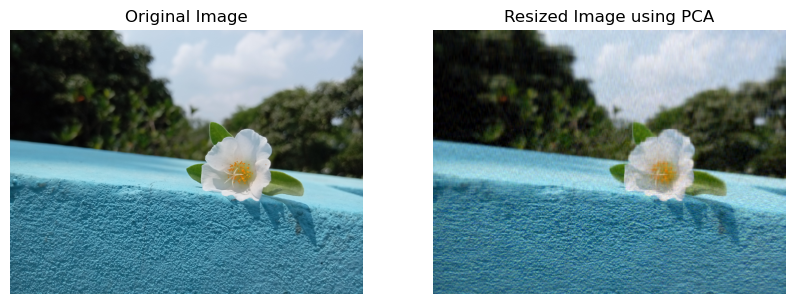

True

In [2]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the color image
image_path = r"E:\pictures\photography\IMG_20220506_133901_379.jpg"
image = cv2.imread(image_path)  # Load image (BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
original_shape = image.shape  # Store original size

# Step 2: Function to apply PCA with automatic component selection
def apply_pca(image_channel, variance_threshold=0.95):
    """Applies PCA to a single color channel and selects components automatically."""
    pca = PCA().fit(image_channel)  # Fit PCA without specifying components
    total_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative sum of explained variance
    
    # Select number of components to preserve 95% variance
    num_components = np.argmax(total_variance >= variance_threshold) + 1
    print(f"Selected {num_components} components for a channel.")
    
    pca = PCA(num_components)
    transformed = pca.fit_transform(image_channel)
    reconstructed = pca.inverse_transform(transformed)
    return np.clip(reconstructed, 0, 255).astype(np.uint8), num_components

# Step 3: Apply PCA to each color channel separately
red_pca, red_components = apply_pca(image[:, :, 0])  
green_pca, green_components = apply_pca(image[:, :, 1]) 
blue_pca, blue_components = apply_pca(image[:, :, 2])  

# Step 4: Merge channels back into a color image
reconstructed_image = np.stack((red_pca, green_pca, blue_pca), axis=-1)

# Step 5: Compute and print sizes
original_size = original_shape[0] * original_shape[1] * 3  # Original size in pixels (RGB)
pca_size = (red_components + green_components + blue_components) * (original_shape[0] + original_shape[1])  # Approximate compressed size

print("\nImage Size Comparison:")
print(f"Original Image Size: {original_size} pixels")
print(f"After PCA Compression: {pca_size} pixels")
compression_ratio = (pca_size / original_size) * 100
print(f"Compression Ratio: {compression_ratio:.2f}% of the original size")

# Step 6: Display the original and resized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Resized Image using PCA")
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()

# Step 7: Save the PCA-resized image
cv2.imwrite("resized_pca.jpg", cv2.cvtColor(reconstructed_image, cv2.COLOR_RGB2BGR))


In [1]:
import sklearn
print(sklearn.__version__)


1.6.1
